In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.head()
len(customer_df.index)

9134

In [3]:
customer_df = customer_df.drop('customer', axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
numerical_df = customer_df.select_dtypes(np.number)
display(numerical_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


customer_lifetime_value


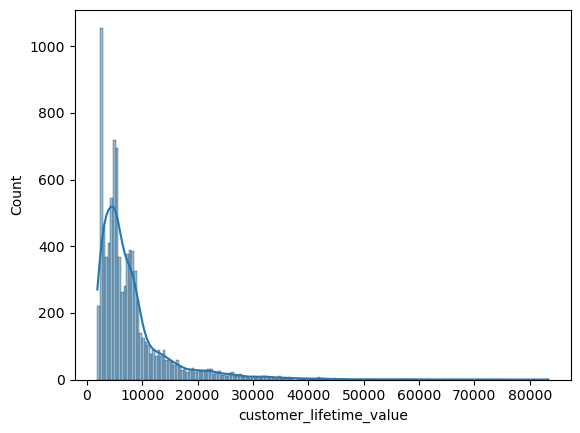

income


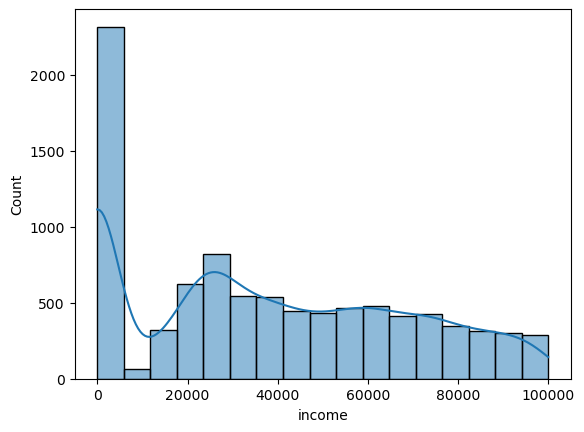

monthly_premium_auto


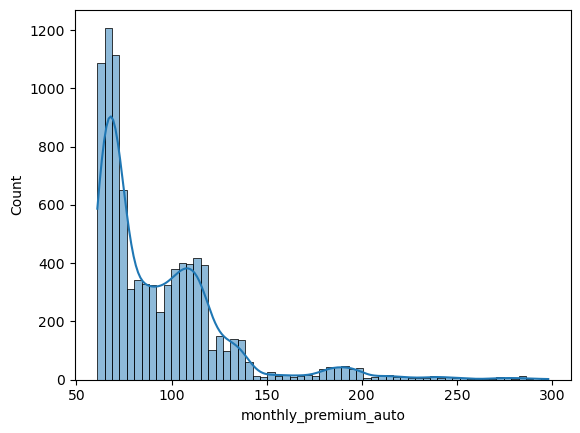

months_since_last_claim


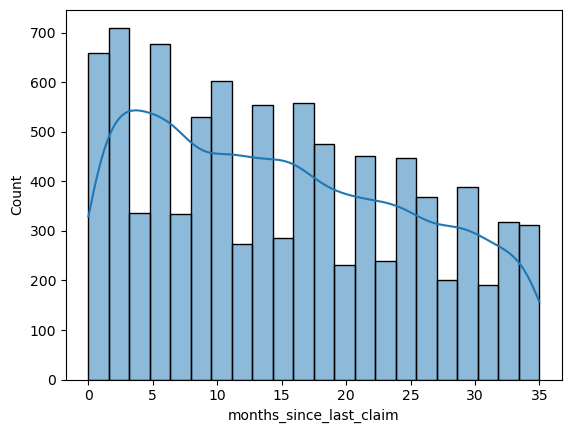

months_since_policy_inception


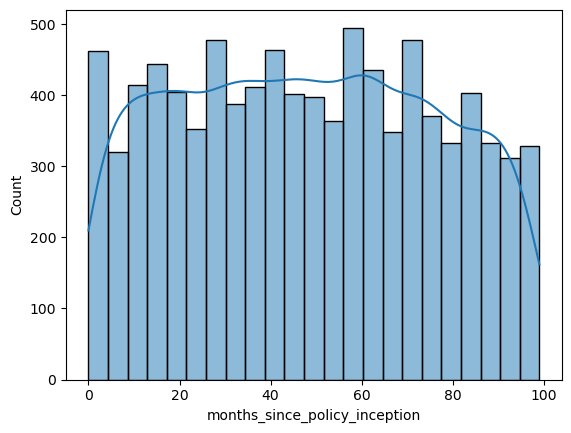

number_of_open_complaints


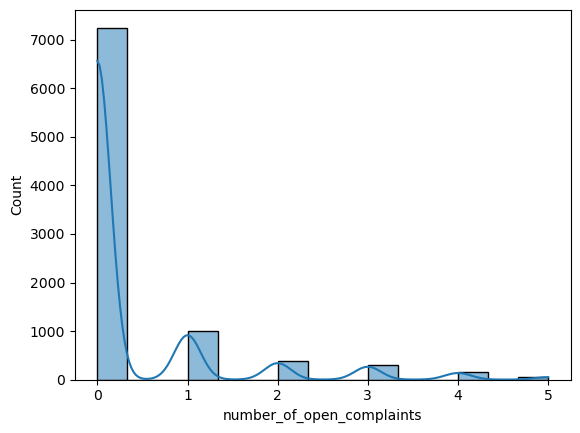

number_of_policies


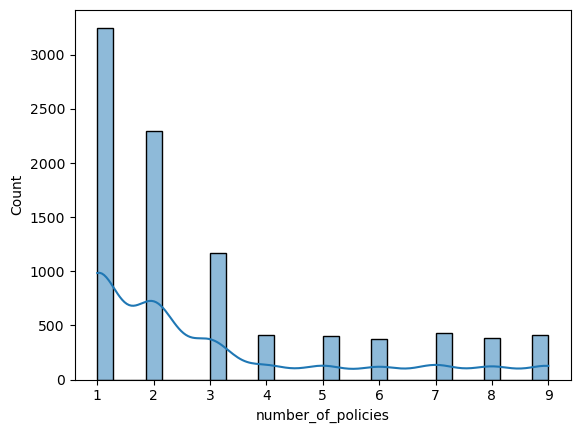

total_claim_amount


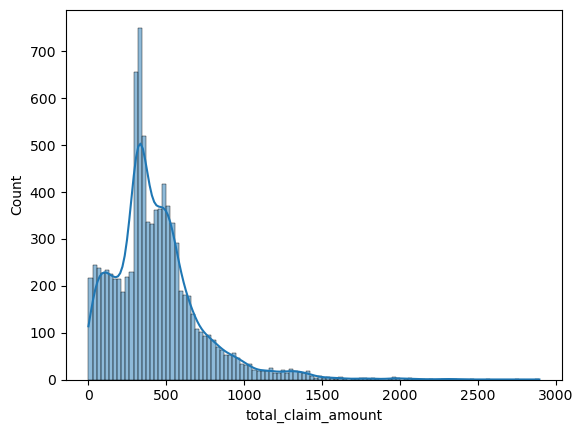

In [6]:
for col in numerical_df.columns:
  print(col)
  sns.histplot(numerical_df[col], kde=True)
  plt.show()

#### columns that follow a normal/exponential distribution
* customer_lifetime_value, monthly_premium_auto, number_of_open_complaints, number_of_policies, total_claim_amount

In [7]:
numerical_log = numerical_df.applymap(lambda x: np.log(x+1))

customer_lifetime_value


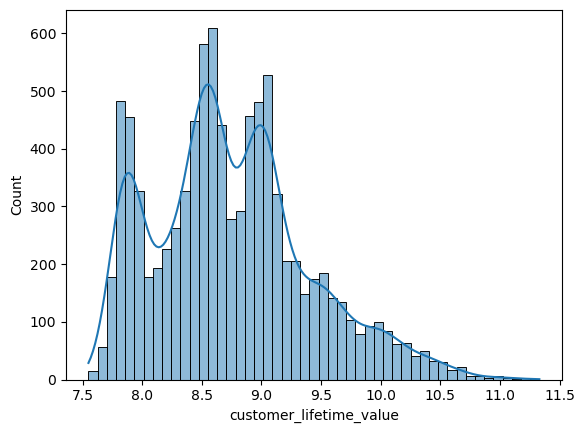

income


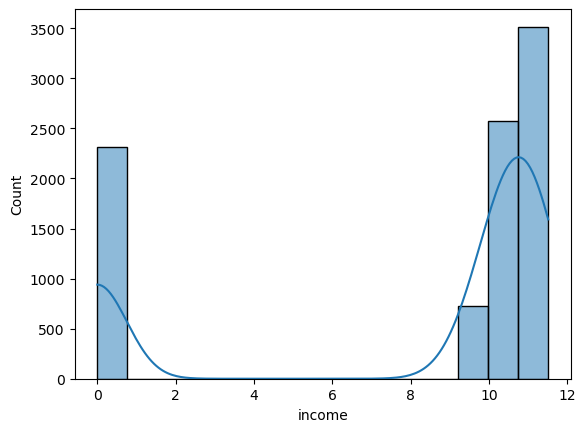

monthly_premium_auto


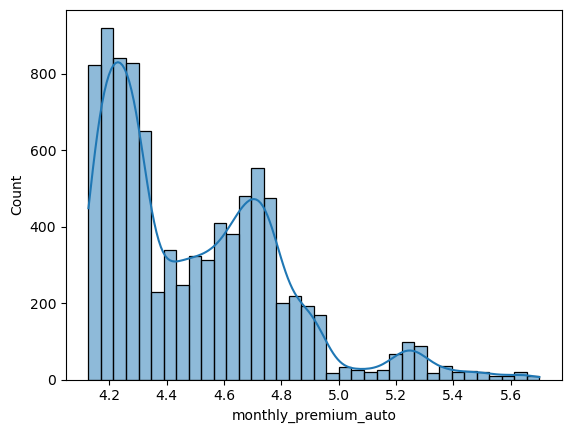

months_since_last_claim


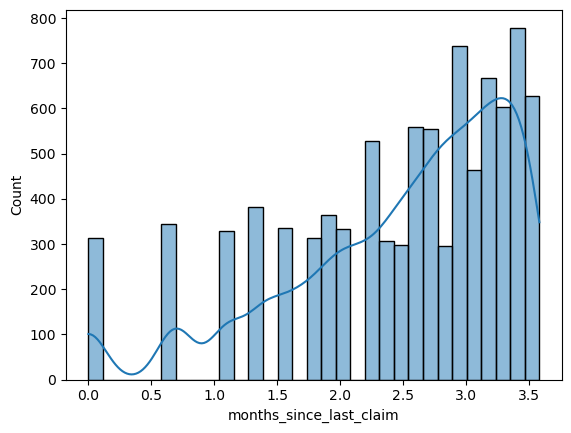

months_since_policy_inception


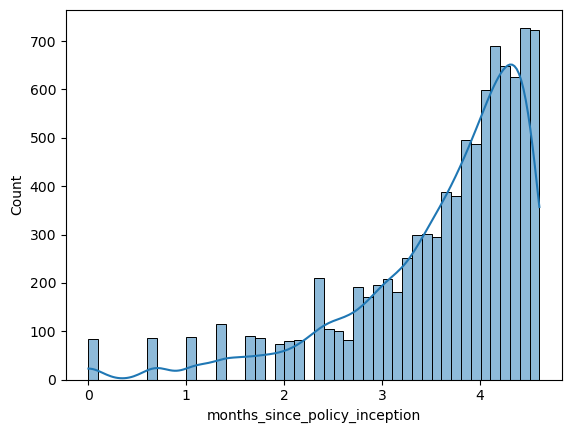

number_of_open_complaints


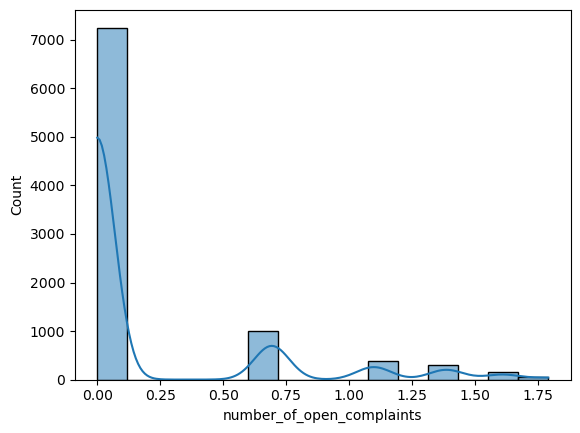

number_of_policies


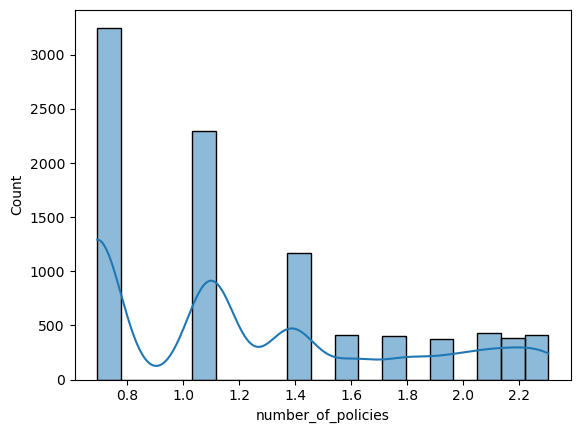

total_claim_amount


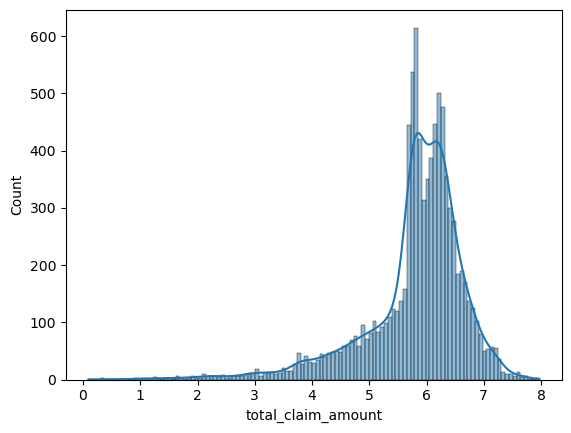

In [8]:
for col in numerical_log.columns:
  print(col)
  sns.histplot(numerical_log[col], kde=True)
  plt.show()

### log scaling altered (inverted) the distribution of total_claim_amount